In [5]:
import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import os

In [6]:
sys.path.append('/home/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory
from NGTS.GACF_utils import TIME_CONVERSIONS

In [12]:
# FIELDNAME = 'NG0004-2950'  # 3574 objects, batches of 50
FIELDNAME = 'NG0442-3345'  # 5059 objects, batches of 100

In [14]:
#     with open('NG0004-2950/field_reduced.json', 'r') as f:
#         field = return_field_from_json_str(f.read())

field = return_field_from_object_directory(os.path.join('/appch/data/jtb34', ""), FIELDNAME,
                                           test='CYCLE1802')


	 object file not found in /appch/data/jtb34/NG0442-3345/549_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/568_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/573_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/598_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/599_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/601_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/612_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/142_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/144_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/822_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/3827_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/10244_VERSION_CYCLE1802


	 object file not found 

matched 5059 of 5060 files


In [15]:
def plot_objects_vs_period(self, calculate=False, signal_to_noise=False, fig_ax_tuple=None,
                               save_if_true_else_return=True, interactive=False,
                               freq=False):
        if calculate:
            self.calculate_periods_from_autocorrelation(calculate_noise=signal_to_noise)
        if fig_ax_tuple is None:
            fig, ax = plt.subplots(figsize=(12, 8))
        else:
            fig, ax = fig_ax_tuple

        max_signal_to_noise = max([max(obj.peak_signal_to_noise) for obj in self if np.array(obj.peak_signal_to_noise).size > 0])
        min_signal_to_noise = min([min(obj.peak_signal_to_noise) for obj in self if np.array(obj.peak_signal_to_noise).size > 0])
        min_obj_id = np.inf
        max_obj_id = 0
        min_p = np.inf
        max_p = -np.inf

        if fig_ax_tuple is None:
            c_min = 1
            c_max = 2  # max_signal_to_noise
            axc = fig.add_axes([0.95, 0.1, 0.01, 0.8])
            norm = mpl.colors.Normalize(vmin=c_min, vmax=c_max)
            cb = mpl.colorbar.ColorbarBase(axc, norm=norm, cmap=mpl.cm.viridis, orientation='vertical')
            cb.set_clim(vmin=c_min, vmax=c_max)
            cb.set_label("Signal to Noise")
        
        for i, obj in enumerate(self):
#             if i>50:
#                 break
            if freq:
                seconds = np.fromiter((x * TIME_CONVERSIONS['d2s'] for x in obj.periods), dtype=np.float64)
                frequencies = np.fromiter((1/x for x in seconds), dtype=np.float64)
                periods = frequencies
            else:
                periods = np.array(obj.periods)
            color = obj.peak_signal_to_noise

            try:
                p_max = periods.max()
                p_min = periods.min()
            except ValueError:
                p_max = np.inf
                p_min = -np.inf
            else:
                if p_max > max_p:
                    max_p = p_max
                if p_min < min_p:
                    min_p = p_min

            obj_id = int(obj.obj)
            if obj_id > max_obj_id:
                max_obj_id = obj_id
            elif obj_id < min_obj_id:
                min_obj_id = obj_id

            if np.array(color).size > 0:
                size = np.interp(color, (min_signal_to_noise, max_signal_to_noise), (0.1, 20))
            else:
                size = color
            y = np.linspace(obj_id, obj_id, len(periods))
            # ax.scatter(periods, y, s=size, c='k')
            ax.scatter(periods, y, c=color, cmap=mpl.cm.viridis, s=size, norm=norm)
            
        if fig_ax_tuple is None:
            ax.set_ylabel('Object no.')
            if freq:
                ax.set_xlabel('Frequency (Hz)')
                
            else:
                ax.set_xlabel('Period (days)')
            ax.set_xscale('log')
            ax.xaxis.grid(True, linestyle='--', alpha=0.5, which='both', lw=1)
            ax.set_xlim([min_p*0.8, max_p + (max_p*0.2)])
            ax.set_ylim([min_obj_id*0.8, max_obj_id + (min_obj_id*0.2)])
            if freq:
                
                def tick_function(freq_locs):
                    period_locs = np.divide(1.0, freq_locs) * TIME_CONVERSIONS['s2d']
                    return ["%.3f" % p for p in period_locs]
                
                fig.suptitle('Objects in NGTSField {} and GACF frequencies'.format(self.fieldname))
                ax.set_xticks(np.logspace(-7, -4, 5))
                ax2 = ax.twiny()
                ax2.set_xlim(ax.get_xlim())
                ax2.set_xscale('log')
                freq_locs = ax.get_xticks()
                ax2.set_xticks(np.linspace(ax.get_xbound()[0], ax.get_xbound()[1], 5))
                print freq_locs
                ax2_ticklocs = tick_function(freq_locs)
                print ax2_ticklocs
                ax2.set_xticklabels(ax2_ticklocs)
                ax2.set_xlabel('Period (days)')
            else:
                fig.suptitle('Objects in NGTSField {} and GACF periods'.format(self.fieldname))
            # ax.set_yticks(np.linspace(0, self.num_objects - 1, self.num_objects))
            # ax.set_yticklabels(['obj_id {}'.format(obj.obj) for obj in self], fontdict={'fontsize': 6})

            

            # ax.set_facecolor('lightgray')

            # ax.set_yticks(np.append(ax.get_yticks(), np.linspace(0, self.num_objects - 1, self.num_objects)))
            # ax.set_yticklabels(np.append(ax.get_yticklabels()[1], ['obj_id {}'.format(obj.obj) for obj in self]),
                               # fontdict={'fontsize': 6})

        if save_if_true_else_return:
            if interactive:
                plt.show()
            else:
                if frequencies:
                    fig.savefig(os.path.join(self.filename, 'Objects_vs_Frequency.png'))
                else:
                    fig.savefig(os.path.join(self.filename, 'Objects_vs_Period.png'))
                plt.close(fig)
                return
        else:
            return fig, ax

[1.00000000e-07 5.62341325e-07 3.16227766e-06 1.77827941e-05
 1.00000000e-04]
['115.741', '20.582', '3.660', '0.651', '0.116']


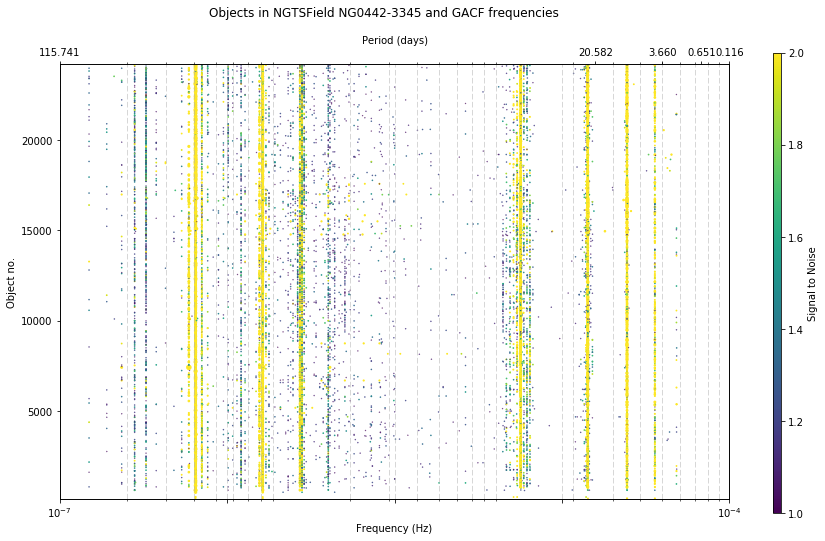

In [16]:
plot_objects_vs_period(field, interactive=True, freq=True)

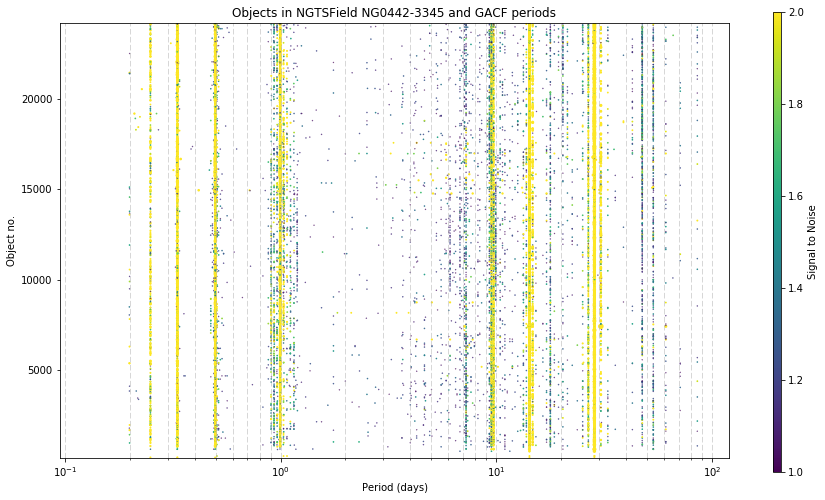

In [17]:
field.plot_objects_vs_period(interactive=True)

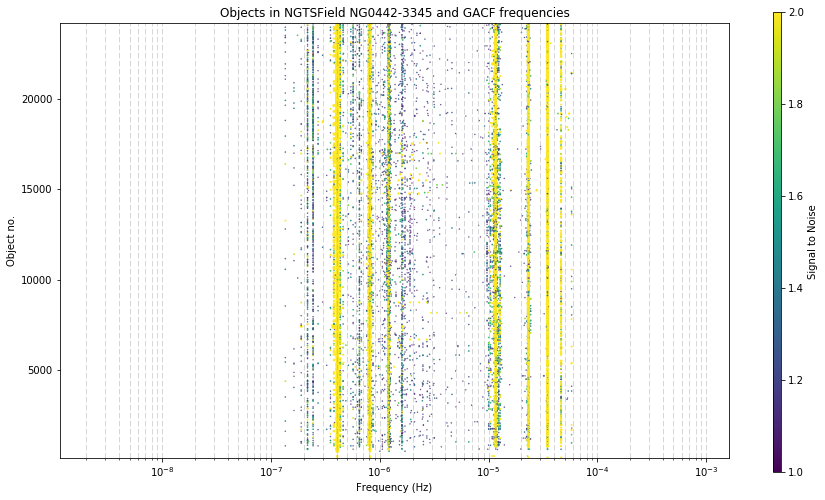

In [18]:
field.plot_objects_vs_period(interactive=True, freq=True)

In [19]:
all_periods = []
for obj in field:
    all_periods = np.append(all_periods, obj.periods)
    
seconds = np.fromiter((x * 86400. for x in all_periods), dtype=np.float64)
all_freq = np.fromiter((1/x for x in seconds), dtype=np.float64)

In [20]:
num_bins = 100

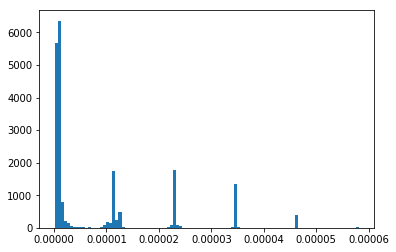

In [24]:
plt.hist(all_freq, bins=num_bins)
plt.show()

In [ ]:
freq_bins_left = hist[1][:-1]
plt.plot(freq_bins_left, hist[0])
plt.show()

In [ ]:
freq_nums_zip = zip(freq_bins_left, hist[0])
freq_nums_zip = sorted(freq_nums_zip, key=lambda x: x[1], reverse=True)
print freq_nums_zip[:10]

In [ ]:
diffs = []
num = 5
for i, p in enumerate(freq_nums_zip[:num]):
    if i < num:
        diffs.append(freq_nums_zip[i+1][0] - p[0])
print diffs
print np.average(diffs)
    

In [ ]:
# sns.set(color_codes=True)
# axp = sns.distplot(all_periods, kde=False, bins=np.logspace(np.log10(1), np.log10(max(all_periods)), num_bins))
# axp.set_xscale('log')
# minor_locator = tk.LogLocator(numticks=20, subs='auto')
# axp.xaxis.set_minor_locator(minor_locator)
# axp.grid(b=True, which='minor', color='w', linewidth=0.5)

# axp.set_ylabel('Count')
# axp.set_xlabel('Period (days)')

# plt.show()

In [ ]:
# seconds = np.fromiter((x * 86400. for x in all_periods), dtype=np.float64)
# frequencies = np.fromiter((1/x for x in seconds), dtype=np.float64)

In [ ]:
# axf = sns.distplot(frequencies, kde=False, bins=np.logspace(np.log10(min(frequencies)), np.log10(max(frequencies)), num_bins))
# axf.set_xscale('log')
# minor_locator = tk.LogLocator(numticks=20, subs='auto')
# axf.xaxis.set_minor_locator(minor_locator)
# axf.grid(b=True, which='minor', color='w', linewidth=0.5)

# axf.set_ylabel('Count')
# axf.set_xlabel('Frequency (Hz)')

# plt.show()

In [ ]:
# %matplotlib
# plt.ion()


In [ ]:
# help(return_field_from_object_directory)